In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import nibabel as nib



In [2]:
# if tf.config.list_physical_devices('GPU'):
#     print("GPU is available.")
# else:
#     print("GPU is not available, using CPU instead.")

In [3]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     try:
#         # Currently, memory growth needs to be the same across GPUs
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#         logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#         print(f"{len(gpus)} Physical GPUs, {len(logical_gpus)} Logical GPUs")
#     except RuntimeError as e:
#         # Memory growth must be set before GPUs have been initialized
#         print(e)

In [4]:
# Loading One image using pydicom and load a 1 patients Volume 
import SimpleITK as sitk

def read_dicom_series(directory_path):
    # Create a reader to automatically detect the series in a folder
    reader = sitk.ImageSeriesReader()
    dicom_series = reader.GetGDCMSeriesFileNames(directory_path)
    reader.SetFileNames(dicom_series)
    
    # Read the DICOM images into a SimpleITK Image object
    image = reader.Execute()
    # Convert SimpleITK Image to a numpy array
    image_array = sitk.GetArrayFromImage(image)
    return image_array

# Example usage
#dicom_folder = 'D:\\University of Rochester Sub\\Machine Learning in Medical Imageing\\FInalPresentationMedicalImaging\\option2\\manifest-1599750808610\\Pancreas-CT\\PANCREAS_0001\\11-24-2015-PANCREAS0001-Pancreas-18957\\Pancreas-99667'
dicom_folder = '/Users/veronicamataramirez/Documents/AImaster/Medical_Imagin/AttentionUnet/Pancreas/manifest-1599750808610/Pancreas-CT/PANCREAS_0082/11-24-2015-PANCREAS0082-Pancreas-89751/Pancreas-39748'
volume = read_dicom_series(dicom_folder)
print(volume.shape)  # Output the volume dimensions


(226, 512, 512)


In [5]:
# def consolidate_dcm_files(source_root, target_folder):
#     """
#     Consolidate DICOM files from nested directories in source_root to target_folder.

#     Parameters:
#     - source_root (str): Path to the root directory containing the DICOM subdirectories.
#     - target_folder (str): Path to the directory where all DICOM files will be consolidated.
#     """
#     # Ensure the target folder exists
#     os.makedirs(target_folder, exist_ok=True)

#     # Walk through all directories in the source root
#     for root, dirs, files in os.walk(source_root):
#         name_folder = os.path.basename(root)
#         lower_name_folder = name_folder.lower()
#         # get the last numebers after PANCREAS_
#         if lower_name_folder.startswith('pancreas_'):
#             folder_number = lower_name_folder.split('_')[-1]
#             folder_number = folder_number + '_'
#         for file in files:
#             # Check if the file matches the DICOM format we're interested in
#             if file.startswith('1-') and file.endswith('.dcm'):
#                 # Construct full path to the file
#                 full_file_path = os.path.join(root, file)
#                 print(f"full_file_path: {folder_number + file}")
#                 # Construct the destination path
#                 destination_file_path = os.path.join(target_folder, folder_number + file)
                
#                 # Check if file already exists to avoid overwrites from different folders
#                 if not os.path.exists(destination_file_path):
#                     # Copy the file to the target folder
#                     shutil.copy(full_file_path, destination_file_path)
#                 else:
#                     print(f"File {file} already exists in the target folder and was not copied to avoid overwrite.")

# # Usage of the function
# source_directory = '/Users/veronicamataramirez/Documents/AImaster/Medical_Imagin/AttentionUnet/Pancreas/manifest-1599750808610/Pancreas-CT'
# target_directory = '/Users/veronicamataramirez/Documents/AImaster/Medical_Imagin/AttentionUnet/training_volume'


In [6]:

# def extract_and_save_slices(source_dir, target_dir):
#     """
#     Extracts slices from NIfTI files and saves them as individual NIfTI files
#     in a specified target directory with a custom naming convention.
    
#     Parameters:
#     - source_dir (str): Path to the directory containing the original NIfTI files.
#     - target_dir (str): Path where the sliced NIfTI files will be stored.
#     """
#     # Make sure the target directory exists
#     os.makedirs(target_dir, exist_ok=True)

#     # List all NIfTI files in the source directory
#     nifti_files = [f for f in os.listdir(source_dir) if f.endswith('.nii.gz')]
    
#     for nifti_file in nifti_files:
#         # Load the NIfTI file
#         file_path = os.path.join(source_dir, nifti_file)
#         img = nib.load(file_path)
        
#         # Extract the file base name without extension for naming
#         base_name = nifti_file.split('.')[0]

#         # Get the image data array
#         data = img.get_fdata()

#         # Iterate over each slice along the third axis (assuming axial slices)
#         for index in range(data.shape[2]):
#             # Extract the slice
#             slice_data = data[:, :, index]
            
#             # Create a NIfTI image from the slice
#             slice_img = nib.Nifti1Image(slice_data, img.affine, img.header)
            
#             # Define the target file name
#             slice_file_name = f"{base_name}_{index + 1:03d}.nii.gz"  # Format: 0001_1-001
#             slice_file_name = slice_file_name.replace("_", "_1-")  # Adjusting to specified format
            
#             # Save the slice as a NIfTI file in the target directory
#             nib.save(slice_img, os.path.join(target_dir, slice_file_name))
#             print(f"Saved: {slice_file_name}")

# # Example usage
# source_directory = '/Users/veronicamataramirez/Documents/AImaster/Medical_Imagin/AttentionUnet/TCIA_pancreas_labels-02-05-2017-1'
# target_directory = '/Users/veronicamataramirez/Documents/AImaster/Medical_Imagin/AttentionUnet/training_labels'

# extract_and_save_slices(source_directory, target_directory)


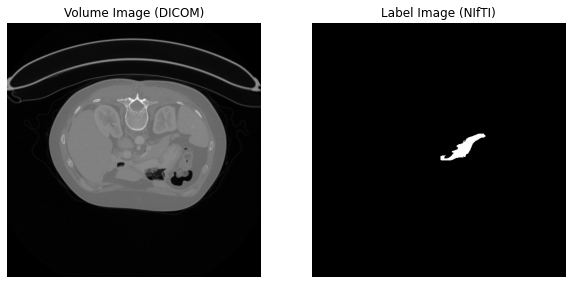

In [7]:
import SimpleITK as sitk
import matplotlib.pyplot as plt

def plot_images(volume_path, label_path):
    """
    Load a DICOM file and a NIfTI file and plot them side by side.

    Parameters:
    - volume_path (str): Path to the DICOM file.
    - label_path (str): Path to the NIfTI file.
    """
    # Load the DICOM file
    volume_image = sitk.ReadImage(volume_path)
    volume_array = sitk.GetArrayFromImage(volume_image)[0]  # Assuming the file has one frame

    # Load the NIfTI file
    label_image = sitk.ReadImage(label_path)
    label_array = sitk.GetArrayFromImage(label_image)

    # Plotting
    plt.figure(figsize=(10, 5))
    
    # Plot the DICOM image
    plt.subplot(1, 2, 1)
    plt.imshow(volume_array, cmap='gray')
    plt.title("Volume Image (DICOM)")
    plt.axis('off')

    # Plot the NIfTI image
    plt.subplot(1, 2, 2)
    plt.imshow(label_array, cmap='gray')
    plt.title("Label Image (NIfTI)")
    plt.axis('off')
    
    plt.show()

# Paths to the files
volume_path = '/Users/veronicamataramirez/Documents/AImaster/Medical_Imagin/AttentionUnet/training_volume/0001_1-120.dcm'
label_path = '/Users/veronicamataramirez/Documents/AImaster/Medical_Imagin/AttentionUnet/training_labels/label0001_1-120.nii.gz'

# Call the function
plot_images(volume_path, label_path)


In [8]:
import os

def get_file_pairs(volume_dir, label_dir):
    # List the files in each directory once
    volume_files = [f for f in os.listdir(volume_dir) if f.endswith('.dcm')]
    label_files = set(os.listdir(label_dir))  # Use a set for O(1) complexity lookups

    # Prepare to collect pairs
    file_pairs = []

    # Create the pairs
    for volume_file in volume_files[:500]: # Limit to 5000 files for demonstration
        volume_base = volume_file.split('.')[0]  # Get the base name without extension
        label_file = f"label{volume_base}.nii.gz"  # Construct the corresponding label filename
        
        # Check if the corresponding label file exists using set lookup
        if label_file in label_files:
            file_pairs.append((os.path.join(volume_dir, volume_file), os.path.join(label_dir, label_file)))
        else:
            print(f"Label file not found for volume file: {volume_base}")

    return file_pairs

# Directory paths
volume_dir = '/Users/veronicamataramirez/Documents/AImaster/Medical_Imagin/AttentionUnet/training_volume'
label_dir = '/Users/veronicamataramirez/Documents/AImaster/Medical_Imagin/AttentionUnet/training_labels'

# Get matched file pairs
file_pairs = get_file_pairs(volume_dir, label_dir)


In [9]:
len(file_pairs)

500

In [10]:
def resize_volume(volume, target_size=(256, 256)):
    # Check if the volume has a channel dimension; add one if not.
    if volume.ndim == 2:  # If the volume is [height, width]
        volume = tf.expand_dims(volume, axis=-1)  # Make it [height, width, 1]
    elif volume.ndim == 3 and volume.shape[-1] not in [1, 3]:  # Common channel sizes are 1 (grayscale) and 3 (RGB)
        volume = tf.expand_dims(volume, axis=0)  # Make it [1, height, width, channels]

    # Perform resizing
    resized_volume = tf.image.resize(volume, target_size)

    return resized_volume


def augment_volume(volume, label):
    # Perform random horizontal flipping
    if tf.random.uniform(()) > 0.5:
        volume = tf.image.flip_left_right(volume)
        label = tf.image.flip_left_right(label)
    return volume, label


In [11]:
import tensorflow as tf
import SimpleITK as sitk

def read_and_preprocess(volume_path, label_path, target_size=(256, 256)):
    # Read and preprocess the data
    volume_image = sitk.ReadImage(volume_path)
    label_image = sitk.ReadImage(label_path)
    
    # Convert SimpleITK image to a NumPy array
    volume_array = sitk.GetArrayFromImage(volume_image)
    label_array = sitk.GetArrayFromImage(label_image)
    
    # Ensure the volume has a channel dimension, assuming the data is greyscale
    volume_array = np.expand_dims(volume_array, axis=-1)
    label_array = np.expand_dims(label_array, axis=-1)
    
    # Normalize and resize if necessary, using TensorFlow operations
    volume_tensor = tf.image.resize(tf.convert_to_tensor(volume_array, dtype=tf.float32) / 255.0, target_size)
    label_tensor = tf.image.resize(tf.convert_to_tensor(label_array, dtype=tf.float32) / 255.0, target_size)
    
    return volume_tensor, label_tensor

def create_tf_dataset(file_pairs):
    # Prepare lists for tensors using list comprehension
    volumes, labels = zip(*[read_and_preprocess(vp, lp) for vp, lp in file_pairs])
    
    # Convert lists to tensors
    volume_tensor = tf.stack(volumes)
    label_tensor = tf.stack(labels)
    
    # Create a TensorFlow dataset from tensors
    return tf.data.Dataset.from_tensor_slices((volume_tensor, label_tensor))

def fix_dimensions(volume):
    # Ensure that the volume has the correct shape (256, 256, 1)
    if volume.ndim == 3 and volume.shape[0] == 1:  # Shape (1, 256, 256)
        volume = tf.squeeze(volume, axis=0)  # Squeeze out the singleton dimension
    if volume.ndim == 2:  # If it's still missing the channel dimension
        volume = tf.expand_dims(volume, axis=-1)

    # remove the first dimension if it's 1
    if volume.shape[0] == 1:
        volume = volume[0]
    return volume

def preprocess_and_augment(volume, label):
    # Resize both volume and label
    volume = fix_dimensions(volume)
    label = fix_dimensions(label)

    volume = resize_volume(volume, (256, 256))
    label = resize_volume(label, (256, 256))

    # Augment both volume and label if desired
    volume, label = augment_volume(volume, label)

    # Normalize the volume and label
    volume /= 255.0  # Ensure your data max value is 255, otherwise adjust normalization
    label /= 255.0
    print(volume.shape, label.shape)
    return volume, label


def setup_dataset(dataset, batch_size=4):
    # Apply preprocessing directly in the dataset operations
    processed_dataset = dataset.map(preprocess_and_augment, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    return processed_dataset.batch(batch_size)


file_pairs = get_file_pairs(volume_dir, label_dir)  # Assuming you have a function to get file pairs correctly
dataset = create_tf_dataset(file_pairs)
final_dataset = setup_dataset(dataset)



NiftiImageIO (0x1487da190): /Users/veronicamataramirez/Documents/AImaster/Medical_Imagin/AttentionUnet/training_labels/label0044_1-021.nii.gz has unexpected scales in sform

NiftiImageIO (0x1487da190): /Users/veronicamataramirez/Documents/AImaster/Medical_Imagin/AttentionUnet/training_labels/label0044_1-021.nii.gz has unexpected scales in sform

NiftiImageIO (0x374849ed0): /Users/veronicamataramirez/Documents/AImaster/Medical_Imagin/AttentionUnet/training_labels/label0044_1-035.nii.gz has unexpected scales in sform

NiftiImageIO (0x374849ed0): /Users/veronicamataramirez/Documents/AImaster/Medical_Imagin/AttentionUnet/training_labels/label0044_1-035.nii.gz has unexpected scales in sform

NiftiImageIO (0x39890bbb0): /Users/veronicamataramirez/Documents/AImaster/Medical_Imagin/AttentionUnet/training_labels/label0044_1-009.nii.gz has unexpected scales in sform

NiftiImageIO (0x39890bbb0): /Users/veronicamataramirez/Documents/AImaster/Medical_Imagin/AttentionUnet/training_labels/label0044_1

(256, 256, 1) (256, 256, 1)


In [12]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import numpy as np

# # Initialize the ImageDataGenerator with horizontal flip
# def create_datagen():
#     return ImageDataGenerator(
#         horizontal_flip=True,
#         fill_mode='nearest',
#     )

# # Function to preprocess and augment a single slice
# def preprocess_and_augment(image_slice, label_slice, datagen):
#     # Reshape the slice to add a batch dimension, required by the ImageDataGenerator
#     image_slice = image_slice.reshape((1,) + image_slice.shape + (1,))
#     label_slice = label_slice.reshape((1,) + label_slice.shape + (1,))
    
#     # Perform augmentation
#     it_image = datagen.flow(image_slice, batch_size=1, seed=42)
#     it_label = datagen.flow(label_slice, batch_size=1, seed=42)
    
#     # Retrieve augmented images and remove batch dimension
#     augmented_image = next(it_image)[0].squeeze()
#     augmented_label = next(it_label)[0].squeeze()
    
#     # Normalize the slices by dividing by 255
#     augmented_image /= 255.0
#     augmented_label /= 255.0
    
#     return augmented_image, augmented_label

# # Apply preprocessing to all slices
# def process_volumes_and_labels(volumes, labels):
#     datagen = create_datagen()
#     preprocessed_volumes = []
#     preprocessed_labels = []

#     # Assume volumes and labels are stacked with the first dimension as the slice index
#     for i in range(volumes.shape[0]):
#         processed_image, processed_label = preprocess_and_augment(volumes[i], labels[i], datagen)
#         preprocessed_volumes.append(processed_image)
#         preprocessed_labels.append(processed_label)

#     # Convert lists to numpy arrays
#     preprocessed_volumes = np.array(preprocessed_volumes)
#     preprocessed_labels = np.array(preprocessed_labels)

#     return preprocessed_volumes, preprocessed_labels

# # Example usage:
# # Assume stacked_volume and stacked_labels are loaded as numpy arrays
# preprocessed_volumes, preprocessed_labels = process_volumes_and_labels(stacked_volume, stacked_labels)

# # Save the preprocessed data
# np.save('preprocessed_volumes256.npy', preprocessed_volumes)
# np.save('preprocessed_labels256.npy', preprocessed_labels)


In [13]:
# import numpy as np

# preprocessed_volumes = np.load('preprocessed_volumes256.npy')
# preprocessed_labels  = np.load('preprocessed_labels256.npy')

In [14]:
# print(preprocessed_volumes.shape)
# print(preprocessed_labels.shape)

In [15]:
# # Making a dataset of Preprocessed volume slices with corresponding mask 
# import tensorflow as tf
# import numpy as np

# # Assume 'preprocessed_volumes' and 'preprocessed_labels' are numpy arrays
# # where preprocessed_volumes[i], preprocessed_labels[i] are the preprocessed slices and labels.

# def create_dataset(preprocessed_volumes, preprocessed_labels, batch_size):
#     # Create TensorFlow datasets from the numpy arrays
#     volume_dataset = tf.data.Dataset.from_tensor_slices(preprocessed_volumes)
#     label_dataset = tf.data.Dataset.from_tensor_slices(preprocessed_labels)

#     # Zip the volume and label datasets together so each element is a tuple (volume_slice, label_slice)
#     dataset = tf.data.Dataset.zip((volume_dataset, label_dataset))

#     # Batch the dataset with the given batch size
#     dataset = dataset.batch(batch_size)

#     # Adding `.cache()` to cache the data in memory, as the data is small enough after preprocessing
#     # `.prefetch()` to allow later elements to be prepared while the current is being processed.
#     dataset = dataset.cache().prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

#     return dataset

# # Example usage:
# batch_size = 2
# dataset = create_dataset(preprocessed_volumes, preprocessed_labels, batch_size)

# # To verify, let's take one batch from the dataset and print shapes
# for volume_batch, label_batch in dataset.take(1):
#     print("Volume batch shape:", volume_batch.shape)  # Expected: (2, height, width)
#     print("Label batch shape:", label_batch.shape)    # Expected: (2, height, width)


In [16]:
def plot_images(volume_batch, label_batch):
    plt.figure(figsize=(10, 5))  # Sets up the figure with a defined size

    # Determine the number of images to plot, limiting to a maximum of 4 for display purposes
    num_images = volume_batch.shape[0]

    for i in range(min(num_images, 4)):  # Iterate over each image up to four
        # Plot the volume images
        plt.subplot(2, 4, i + 1)
        # Remove singleton dimensions for visualization
        volume_image = np.squeeze(volume_batch[i].numpy())
        plt.imshow(volume_image, cmap='gray')
        plt.axis('off')
        plt.title("Volume")

        # Plot the corresponding label images
        plt.subplot(2, 4, i + 5)
        label_image = np.squeeze(label_batch[i].numpy())
        plt.imshow(label_image, cmap='gray')
        plt.axis('off')
        plt.title("Label")

    plt.show()


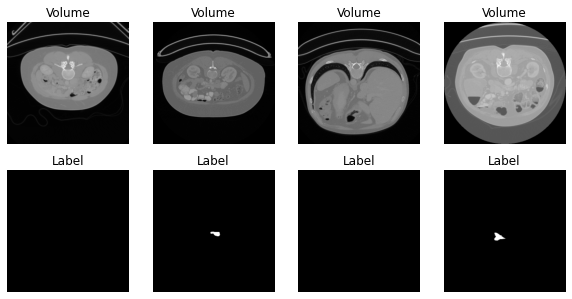

In [17]:
# plot the first batch of the final dataset
for volume_batch, label_batch in final_dataset.skip(25).take(1):
    plot_images(volume_batch, label_batch)

In [18]:
# get dimension of the train_dataset and val_dataset
trainx= final_dataset.skip(25).take(1)
valx = final_dataset.skip(25).take(1)

print(trainx)
print(valx)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name=None))>
<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name=None))>


In [19]:
# get the length of the dataset
def get_dataset_length(dataset):
    return sum(1 for _ in dataset)

# Example usage
dataset_length = get_dataset_length(final_dataset)
print("Dataset length:", dataset_length)

Dataset length: 125


In [20]:
def split_dataset(dataset, train_size, val_size, test_size, shuffle_size=10000):
    # Ensure the sum of the split sizes equals 1
    assert (train_size + val_size + test_size) == 1
    
    # Shuffle the dataset
    dataset = dataset.shuffle(buffer_size=shuffle_size)
    
    # Count the total number of elements in the dataset
    dataset_size = dataset.cardinality().numpy()
    if dataset_size == -1:  # If the size is unknown
        raise ValueError("Dataset size is unknown. Ensure your dataset is finite.")
    
    # Calculate the number of elements in each split
    train_size = int(train_size * dataset_size)
    val_size = int(val_size * dataset_size)

    # Define datasets
    train_dataset = dataset.take(train_size)
    val_dataset = dataset.skip(train_size).take(val_size)
    test_dataset = dataset.skip(train_size + val_size)
    
    return train_dataset, val_dataset, test_dataset

# Example usage:
train_size = 0.8
val_size = 0.1
test_size = 0.1
train_dataset, val_dataset, test_dataset = split_dataset(final_dataset, train_size, val_size, test_size)

# Check how many batches are in each split (Optional)
print("Train set batches:", train_dataset.cardinality().numpy())
print("Validation set batches:", val_dataset.cardinality().numpy())
print("Test set batches:", test_dataset.cardinality().numpy())


Train set batches: 100
Validation set batches: 12
Test set batches: 13


In [21]:
trainx= train_dataset.skip(25).take(1)
valx = val_dataset.skip(25).take(1)

print(trainx)
print(valx)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name=None))>
<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name=None))>


# Implementation of Attention U-Net from Scratch 
### Modification Done : In the Original Paper its showed conv3D layers being used but instead we want to do slice wise thats why we are using Conv2D.


In [22]:
import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras.models import Model

def conv_block(x, num_filters):
    x = L.Conv2D(num_filters, 3, padding="same")(x)
    x = L.BatchNormalization()(x)
    x = L.Activation("relu")(x)

    x = L.Conv2D(num_filters, 3, padding="same")(x)
    x = L.BatchNormalization()(x)
    x = L.Activation("relu")(x)

    return x

def encoder_block(x, num_filters):
    x = conv_block(x, num_filters)
    p = L.MaxPool2D((2, 2))(x)
    return x, p

def attention_gate(g, s, num_filters):
    Wg = L.Conv2D(num_filters, 1, padding="same")(g)
    Wg = L.BatchNormalization()(Wg)

    Ws = L.Conv2D(num_filters, 1, padding="same")(s)
    Ws = L.BatchNormalization()(Ws)

    out = L.Activation("relu")(Wg + Ws)
    out = L.Conv2D(num_filters, 1, padding="same")(out)
    out = L.Activation("sigmoid")(out)

    return out * s

def decoder_block(x, s, num_filters):
    x = L.UpSampling2D(interpolation="bilinear")(x)
    s = attention_gate(x, s, num_filters)
    x = L.Concatenate()([x, s])
    x = conv_block(x, num_filters)
    return x

def attention_unet(input_shape):
    """ Inputs """
    inputs = L.Input(input_shape)

    """ Encoder """
    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)

    b1 = conv_block(p3, 256)

    """ Decoder """
    d1 = decoder_block(b1, s3, 256)
    d2 = decoder_block(d1, s2, 128)
    d3 = decoder_block(d2, s1, 64)

    """ Outputs """
    outputs = L.Conv2D(1, 1, padding="same", activation="sigmoid")(d3)

    """ Model """
    model = Model(inputs, outputs, name="Attention-UNET")
    return model

if __name__ == "__main__":
    input_shape = (256, 256, 1)
    model = attention_unet(input_shape)
    #model.summary()

In [23]:
import tensorflow as tf

class DiceScore(tf.keras.metrics.Metric):
    def __init__(self, name='dice_score', **kwargs):
        super(DiceScore, self).__init__(name=name, **kwargs)
        self.dice_score = self.add_weight(name='ds', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.math.sigmoid(y_pred)  # Apply sigmoid to logits
        numerator = 2 * tf.reduce_sum(y_true * y_pred)
        denominator = tf.reduce_sum(y_true + y_pred)
        
        # Add a small epsilon to avoid division by zero
        self.dice_score.assign(numerator / (denominator + tf.keras.backend.epsilon()))

    def result(self):
        return self.dice_score

    def reset_states(self):
        self.dice_score.assign(0.0)

class IoUScore(tf.keras.metrics.Metric):
    def __init__(self, name='iou_score', **kwargs):
        super(IoUScore, self).__init__(name=name, **kwargs)
        self.iou_score = self.add_weight(name='iou', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.math.sigmoid(y_pred)  # Apply sigmoid to logits
        intersection = tf.reduce_sum(y_true * y_pred)
        union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection
        
        # Add a small epsilon to avoid division by zero
        self.iou_score.assign(intersection / (union + tf.keras.backend.epsilon()))

    def result(self):
        return self.iou_score

    def reset_states(self):
        self.iou_score.assign(0.0)

class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.f1_score = self.add_weight(name='f1', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.math.sigmoid(y_pred)  # Convert logits to binary
        precision = tf.reduce_sum(y_true * y_pred) / tf.reduce_sum(y_pred)
        recall = tf.reduce_sum(y_true * y_pred) / tf.reduce_sum(y_true)
        
        # Calculate F1 score
        self.f1_score.assign(2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

    def result(self):
        return self.f1_score

    def reset_states(self):
        self.f1_score.assign(0.0)

# Example usage:
# model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
#     loss=FocalLoss(gamma=2, balance_param=1.0),
#     metrics=[DiceScore(), IoUScore(), F1Score()]
#)


In [24]:
from tensorflow.keras.losses import BinaryFocalCrossentropy
from tensorflow.keras.metrics import MeanIoU

model = attention_unet((256, 256, 1))  # Assuming this is your UNet model function
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
model.compile(optimizer=optimizer, loss=BinaryFocalCrossentropy(), metrics=["accuracy",MeanIoU(num_classes=2)])

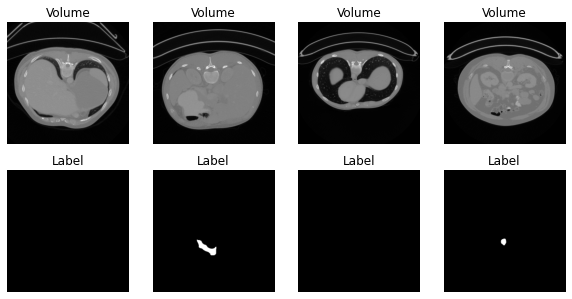

In [25]:
for volume_batch, label_batch in train_dataset.skip(10).take(1):
    plot_images(volume_batch, label_batch)

In [26]:
# Fit the model
history = model.fit(train_dataset, validation_data=val_dataset, epochs=10)


Epoch 1/10
100/100 [==============================] - 185s 2s/step - loss: 0.0509 - accuracy: 0.9581 - mean_io_u: 1.0000 - val_loss: 0.0779 - val_accuracy: 0.9974 - val_mean_io_u: 1.0000
Epoch 2/10
100/100 [==============================] - 185s 2s/step - loss: 0.0142 - accuracy: 0.9977 - mean_io_u: 1.0000 - val_loss: 0.0179 - val_accuracy: 0.9983 - val_mean_io_u: 1.0000
Epoch 3/10
100/100 [==============================] - 185s 2s/step - loss: 0.0076 - accuracy: 0.9978 - mean_io_u: 1.0000 - val_loss: 0.0079 - val_accuracy: 0.9982 - val_mean_io_u: 1.0000
Epoch 4/10
100/100 [==============================] - 190s 2s/step - loss: 0.0051 - accuracy: 0.9980 - mean_io_u: 1.0000 - val_loss: 0.0043 - val_accuracy: 0.9977 - val_mean_io_u: 1.0000
Epoch 5/10
100/100 [==============================] - 195s 2s/step - loss: 0.0038 - accuracy: 0.9981 - mean_io_u: 1.0000 - val_loss: 0.0041 - val_accuracy: 0.9978 - val_mean_io_u: 1.0000
Epoch 6/10
100/100 [==============================] - 190s 2s/ste

/Users/veronicamataramirez/miniforge3/envs/hbw/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


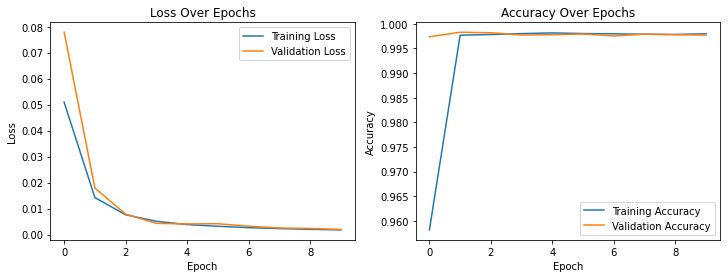

In [27]:
model.save("10-epochAU-Net.h5")
# To see the training process
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Call to plot the history
plot_history(history)

In [28]:
# Assuming 'model' is your trained model and 'test_dataset' is your TensorFlow dataset prepared for testing
predictions = model.predict(test_dataset)  # This will output the predictions for the entire test dataset


13/13 [==============================] - 7s 534ms/step


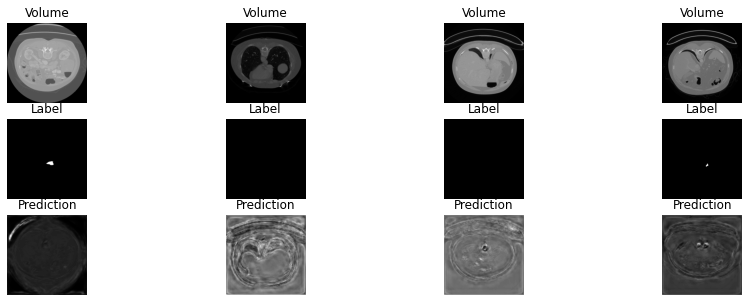

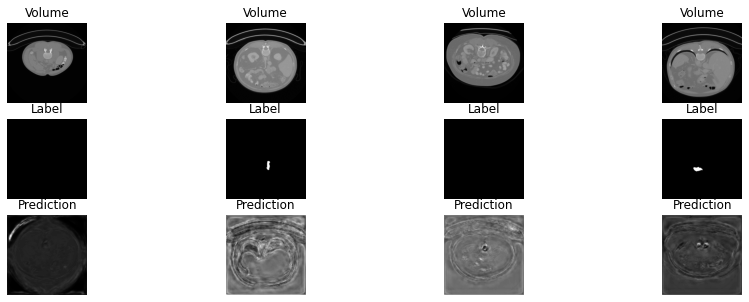

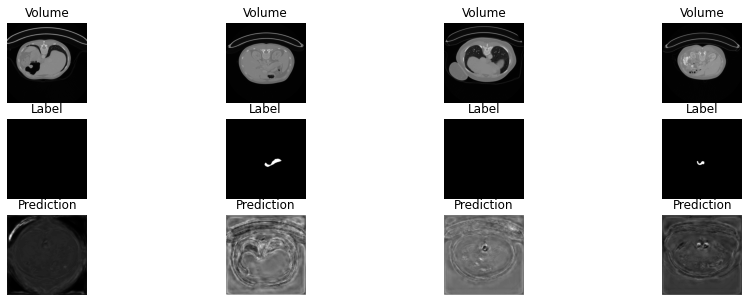

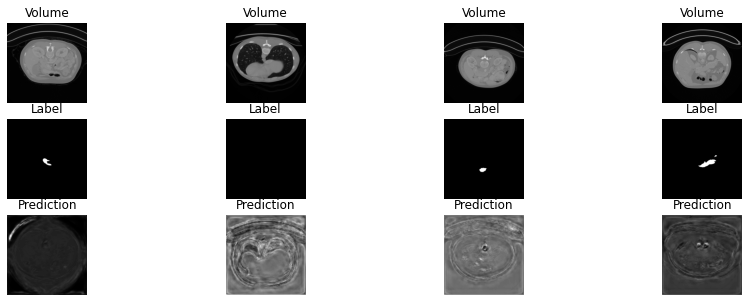

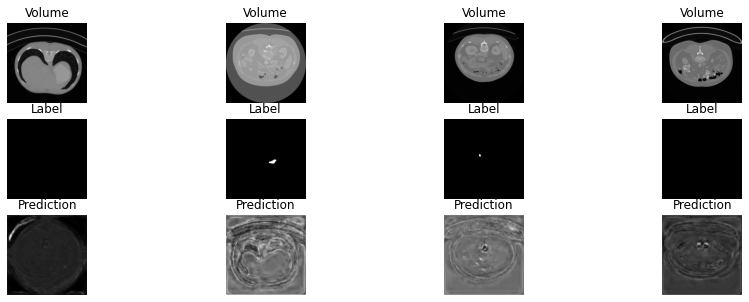

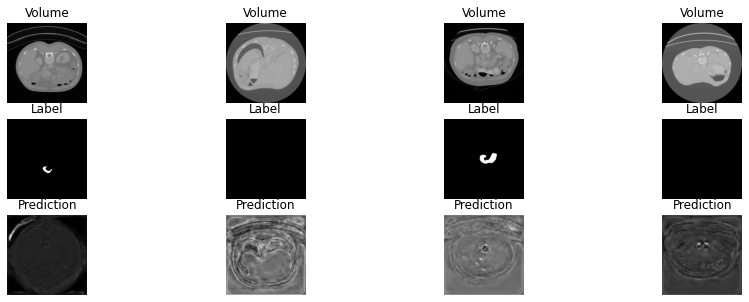

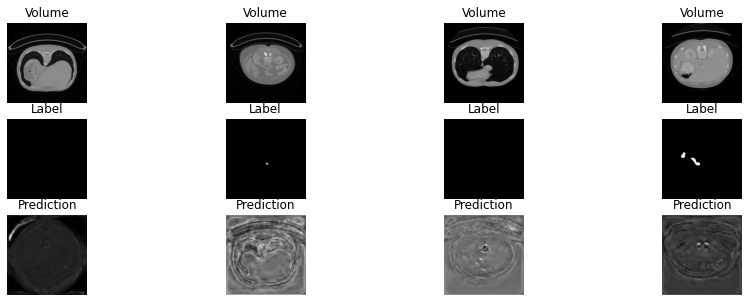

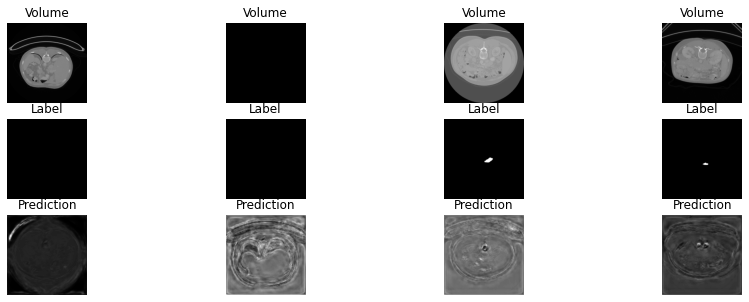

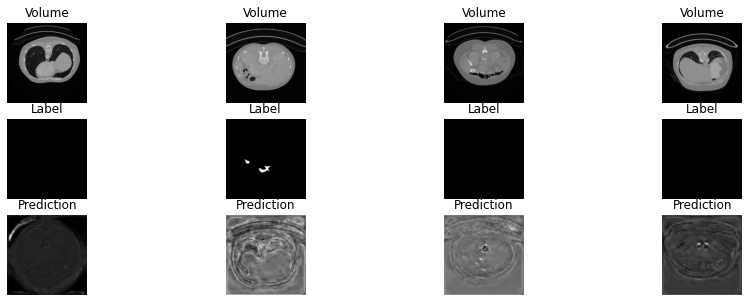

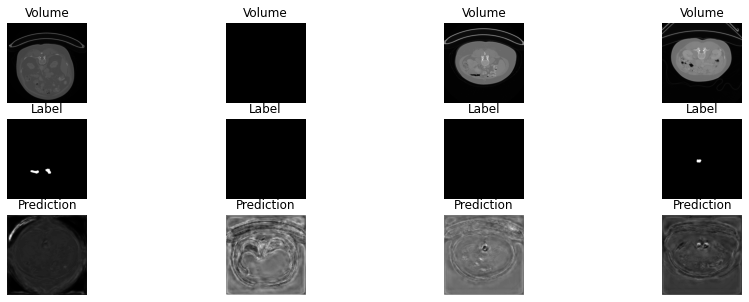

In [29]:
def plot_predictions(volume_batch, label_batch, prediction_batch):
    plt.figure(figsize=(15, 5))

    # Determine the number of images to plot, limiting to a maximum of 4 for display purposes
    num_images = volume_batch.shape[0]

    for i in range(min(num_images, 4)):  # Iterate over each image up to four
        # Plot the volume images
        plt.subplot(3, 4, i + 1)
        volume_image = np.squeeze(volume_batch[i].numpy())
        plt.imshow(volume_image, cmap='gray')
        plt.axis('off')
        plt.title("Volume")

        # Plot the corresponding label images
        plt.subplot(3, 4, i + 5)
        label_image = np.squeeze(label_batch[i].numpy())
        plt.imshow(label_image, cmap='gray')
        plt.axis('off')
        plt.title("Label")

        # Plot the corresponding prediction images
        plt.subplot(3, 4, i + 9)
        prediction_image = np.squeeze(prediction_batch[i])
        plt.imshow(prediction_image, cmap='gray')
        plt.axis('off')
        plt.title("Prediction")

    plt.show()

# Assuming 'predictions' is the output of model.predict(test_dataset)

for volume_batch, label_batch in test_dataset.take(10):
    plot_predictions(volume_batch, label_batch, predictions)
    